<a href="https://colab.research.google.com/github/PX2145-2025/week-2-b-Emma-Goldsmith/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 0 - Write a function convert(angle) to convert angles in degrees to radians. Write another function recenter(angle) to wrap angles in radian into the
 interval. Save those two functions into a file named anglesutils.py.


In [2]:
%%writefile anglesutils.py

import numpy as np

#create function that converts angles in degrees to radians
def convert(angle):
  return (angle*np.pi)/180

  #write function to wrap angles in radian into the interval pi, -pi
def recenter(angle):
  angle_plus_pi = angle + np.pi
  angle_plus_pi_modulo = angle_plus_pi % (2*np.pi)
  return -(angle_plus_pi_modulo - np.pi)

Overwriting anglesutils.py


In [3]:
#importing package
import anglesutils as au

In [5]:
au.convert(90)

1.5707963267948966

In [8]:
#position at t=0 is 45 degrees
def position(t):
  return 45 +(0.5*t**2)

In [11]:
#plot function from t=0 to t=30
t = np.linspace(0, 30)
x = position(t)

Text(0, 0.5, 'Position [Rad]')

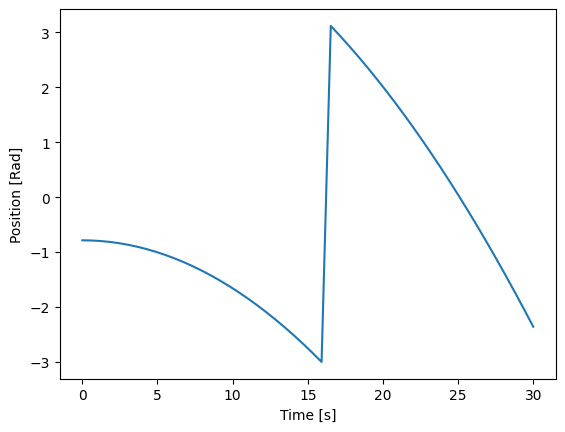

In [16]:
plt.plot(t, au.recenter(au.convert(x)));
# ; removes the little text above the plot
plt.xlabel('Time [s]')
plt.ylabel('Position [Rad]')

Exercise 1
Define a function func1(time,amplitude,frequency,phase) which returns a sine wave (as a function of time) of chosen amplitude, frequency and phase. Test it out with different amplitude, frequency and phase values by plotting suitable graphs. Set the default values for ampliture, frequency and phase to be 1, 1 and 0, respectively.

In [19]:
def func1(time,amplitude=1,frequency=1,phase=0):
  return(amplitude * np.sin(2*np.pi * frequency * time+phase))

Text(0.5, 1.0, 'Effect of Phase')

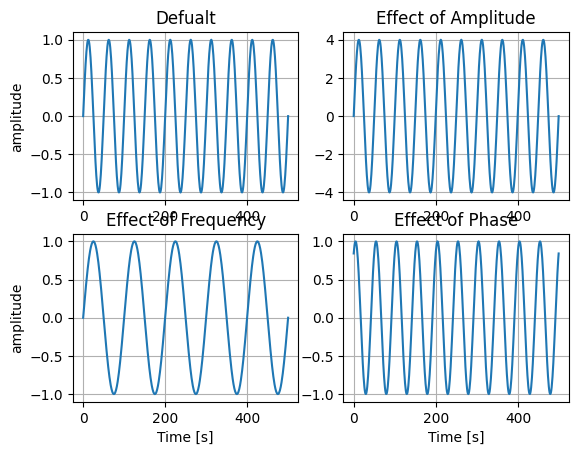

In [33]:
plt.figure()
plt.subplot(2,2,1)
amplitude = 1
frequency = 1
phase = 0
plt.plot(func1(np.linspace(0,10,500), amplitude, frequency, phase))
plt.grid()
plt.ylabel('amplitude')
plt.title('Defualt')

plt.subplot(2,2,2)
amplitude = 4
frequency = 1
phase = 0
plt.plot(func1(np.linspace(0,10,500), amplitude, frequency, phase))
plt.grid()
plt.xlabel
plt.title('Effect of Amplitude')

plt.subplot(2,2,3)
amplitude = 1
frequency = 0.5
phase = 0
plt.plot(func1(np.linspace(0,10,500), amplitude, frequency, phase))
plt.grid()
plt.ylabel('amplitude')
plt.xlabel('Time [s]')
plt.title('Effect of Frequency')

plt.subplot(2,2,4)
amplitude = 1
frequency = 1
phase = 1
plt.plot(func1(np.linspace(0,10,500), amplitude, frequency, phase))
plt.grid()
plt.xlabel('Time [s]')
plt.title('Effect of Phase')

Exercise 2 -
A satellite has a circular orbit around the Earth with a period *T*

In [34]:
#1. Prove that its altitude h above the Earth‘s surface is (M is Earth’s mass and R its radius)


$F = \frac{GMm}{r^2}$ , $F=\frac{mv^2}{r}$

$\frac{GMm}{r^2} =\frac{mv^2}{r}$

$ \frac{GMm}{r^2} =m(2\pi f)^2r$

$GM =( \frac{2\pi}{T}^2)r^3$

$GM = (\frac{4\pi^2}{T^2})f^3$

$\frac{GMT^2}{4\pi^2} = r^3$

$r = (\frac{GMT^2}{4\pi^2})^\frac{1}{3}$

$r = h + R$

$h = (\frac{GMT^2}{4\pi^2})^\frac{1}{3} - R$

In [74]:
# 2. Write a function to evaluate h
def h(G, M, T, R):
  return ((G*M*T**2)/(4*np.pi**2))**(1/3) - R

In [97]:
#3. Write a program that requests user input of T and then prints out the altitude in kilometre

from numpy import *
from matplotlib.pyplot import *

G = 6.67e-11
M = 5.97e24
R = 6.37e6

T_str = input("Please input a time in seconds: \n")
T = float(T_str)

print("The altitude in KM is:", (h(G, M, T, R))/1000)

Please input a time in seconds: 
86400
The altitude in KM is: 35856.91017617498


In [78]:

#4. Hence find the altitudes of satellites that orbit the Earth once a day (‘geosynchronous’ orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

T_day = 24*60*60
print("The altitude of satellites that orbit Earth once a day in kilometers is", h(G, M, T_day, R)/1000)

T_90 = 90*60
print("The altitude of satellites that orbit Earth once every 90 minutes in kilometers is", h(G, M, T_90, R)/1000)

T_45 = 45*60
print("The altitude of satellites that orbit Earth once once every 45 minutes in kilometers is", h(G, M, T_45, R)/1000)

The altitude of satellites that orbit Earth once a day in kilometers is 35856.91017617498
The altitude of satellites that orbit Earth once every 90 minutes in kilometers is 280.3216253728606
The altitude of satellites that orbit Earth once once every 45 minutes in kilometers is -2180.5598978108233


Exercise 3

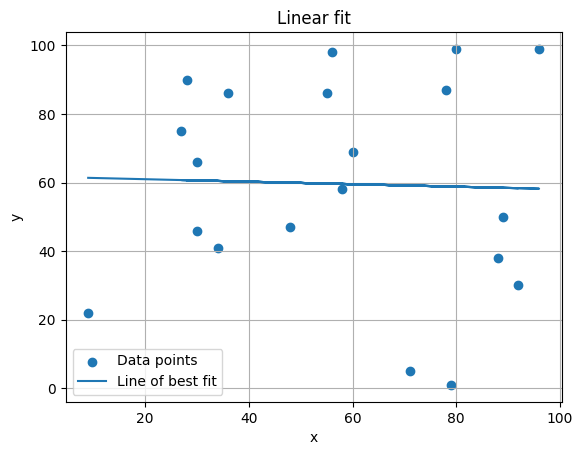

The slope and intercept are [-3.63420134e-02  6.17287632e+01]
The error in slope is 37.186913448216934
The error in the intercept is 2328.0611671741


In [103]:
# 1. Write a function linfit(x,y) to perform a least squares fit of data using the method described last year in PX1224 week 4 to return estimates of slope and intercept (and their errors).
from numpy import *
from matplotlib.pyplot import *

#define the function linfit(x,y) to perform a least squares fit
def linfit(x,y):
  #define x and y as arrays
  x = array(x)
  y = array(y)
  #Find and plot first order line of best fit
  p_coeff = polyfit(x, y, 1)
  p = poly1d(p_coeff)
  x_line = linspace(min(x), max(x), 100)
  plot(x, p(x), label='Line of best fit')
  # Uncertainties on the slope and intercept
  n= len(x) #number of elements in array
  D= sum(x**2) - 1/n * sum(x)**2
  x_bar = mean(x) #average x value
  residuals = y - p(x)
  p_coeff_full, residuals_full, _, _, _ = polyfit(x, y, 1, full=True) # residulas is the differente between observed and predicted values of data
  dm_squared= 1/(n-2)*sum(residuals_full**2) / D
  dc_squared = 1/(n-2)*(D/n + x_bar**2)*sum(residuals_full**2) / D
  # Define terms
  dm = sqrt(dm_squared)
  dc = sqrt(dc_squared)
  return p_coeff, dm, dc

#generate random data for x and y
import random
x_data = [random.randrange(0, 100, 1) for _ in range(20)]
y_data = [random.randrange(0, 100, 1) for _ in range(20)]

#plot x and y data with slope and errors using function
figure()
scatter(x_data, y_data, label = "Data points")
p_coeff, dm, dc = linfit(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear fit')
plt.legend()
plt.grid()
plt.show()

print("The slope and intercept are", p_coeff)
print("The error in slope is", dm)
print("The error in the intercept is",dc)

In [102]:
#2. ut your functions into your own package, using a suitable file name. Type the code you want to be in the package (including comments!) in a cell of the notebook, pick a name for the file and add %%writefile <file_name>.py at the top of the cell to have the notebook create the file.

%%writefile my_function_package.py

def h(G, M, T, R):
  return ((G*M*T**2)/(4*np.pi**2))**(1/3) - R

G = 6.67e-11
M = 5.97e24
R = 6.37e6

#define the function linfit(x,y) to perform a least squares fit
def linfit(x,y):
  #define x and y as arrays
  x = array(x)
  y = array(y)
  #Find and plot first order line of best fit
  p_coeff = polyfit(x, y, 1)
  p = poly1d(p_coeff)
  x_line = linspace(min(x), max(x), 100)
  plot(x, p(x), label='Line of best fit')
  # Uncertainties on the slope and intercept
  n= len(x) #number of elements in array
  D= sum(x**2) - 1/n * sum(x)**2
  x_bar = mean(x) #average x value
  residuals = y - p(x)
  p_coeff_full, residuals_full, _, _, _ = polyfit(x, y, 1, full=True) # residulas is the differente between observed and predicted values of data
  dm_squared= 1/(n-2)*sum(residuals_full**2) / D
  dc_squared = 1/(n-2)*(D/n + x_bar**2)*sum(residuals_full**2) / D
  # Define terms
  dm = sqrt(dm_squared)
  dc = sqrt(dc_squared)
  return p_coeff, dm, dc


Overwriting my_function_package.py


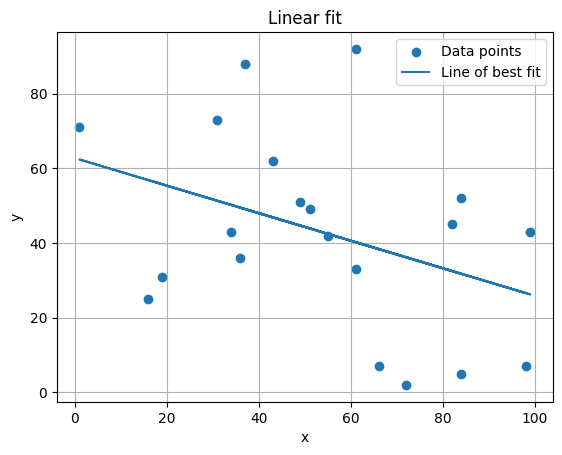

In [89]:
import my_function_package as mfp

  #generate random data for x and y
import random
x_data = [random.randrange(0, 100, 1) for _ in range(20)]
y_data = [random.randrange(0, 100, 1) for _ in range(20)]

#plot x and y data with slope and errors using function
figure()
scatter(x_data, y_data, label = "Data points")
p_coeff, dm, dc = linfit(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear fit')
plt.legend()
plt.grid()
plt.show()